### 데이터 생성
선형회귀(Linear Regression)를 위한 딥러닝 모델 을 만들어보도록 하겠습니다. 

* 데이터셋을 make_regression 함수를 이용하여 입력 X와 정답 y로
* 샘플 갯수(n_samples) 200개
* 특징 갯수(n_featrues) 1개
* 바이어스(bias)는 5.0
* 노이즈(noise)는 5.0
* random_state는 123

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1, 
                       bias=5.0, noise=5.0, random_state=123)

Matplotlib is building the font cache; this may take a moment.


In [7]:
print( 'X.shape : ' , X.shape)
print( 'y.shape : ' , y.shape)

X.shape :  (200, 1)
y.shape :  (200,)


In [8]:
y = np.expand_dims(y, axis=1)
print( 'y.shape : ' , y.shape)

y.shape :  (200, 1)


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=123)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


### 모델 생성
* 딥러닝라이브러리 Tensorflow와 keras를 임포트
* 케라스(Keras)의 모델, 레이어, 옵티마이저, 유틸    임포트. .. models, layers, optimizer, utils

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils

모델은 간단하게 Sequential()을 이용해 선언하고, Dense 레이어 하나를 추가해줍니다. 레이어의 유닛수는 1개이고, activation은 선형 회귀이니 'linear'로 지정하며, input_shape은 (1,) 으로 1차원 모양으로 입력 모양을 가집니다. 최종 모델의 구조를 summary() 함수를 통해 확인

In [13]:
model = keras.Sequential()
model.add(layers.Dense(1, activation='linear', input_shape=(1,)))

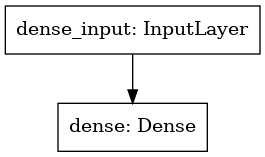

In [14]:
utils.plot_model(model)

### 모델 학습

* 딥러닝 모델의 학습 진행 방식을 결정하는 옵티마이저(optimizer)로 SGD(Stochastic Gradient Descent) 를 사용
* compile() 함수를 통해서 손실 함수(loss function), 옵티마이저(optimizer), 지표(metrics)를 지정

* 모델의 학습에 필요한 손실 함수로 mse를 지정하여 Mean Square Error를 사용하고, 옵티마이저는 정의했던 SGD를 사용합니다. 

* 지표로는 mae와 mse를 사용하는데 여기서 MAE는 Mean Absolute Error를 의미합니다.

* 모델 학습을 진행하기위해 fit() 함수를 호출합니다. 

* 학습을 위해 x_train과 y_train를 지정하고, 학습 반복 횟수인 epochs를 40으로 지정합니다.

In [16]:
optimizer= optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
history = model.fit(x_train, y_train, epochs=40)

Epoch 1/40
5/5 [==============================] - 2s 2ms/step - loss: 644.1600 - mae: 20.3249 - mse: 644.1600
Epoch 2/40
5/5 [==============================] - 0s 2ms/step - loss: 517.0123 - mae: 18.2934 - mse: 517.0123
Epoch 3/40
5/5 [==============================] - 0s 2ms/step - loss: 416.3866 - mae: 16.3618 - mse: 416.3866
Epoch 4/40
5/5 [==============================] - 0s 1ms/step - loss: 336.0362 - mae: 14.7610 - mse: 336.0362
Epoch 5/40
5/5 [==============================] - 0s 1ms/step - loss: 271.6155 - mae: 13.2726 - mse: 271.6155
Epoch 6/40
5/5 [==============================] - 0s 1ms/step - loss: 220.4473 - mae: 11.9238 - mse: 220.4473
Epoch 7/40
5/5 [==============================] - 0s 2ms/step - loss: 180.0120 - mae: 10.7783 - mse: 180.0120
Epoch 8/40
5/5 [==============================] - 0s 1ms/step - loss: 147.6062 - mae: 9.7570 - mse: 147.6062
Epoch 9/40
5/5 [==============================] - 0s 1ms/step - loss: 121.5450 - mae: 8.8568 - mse: 121.5450
Epoch 10/40


* 모델이 학습하면서 각 epoch 마다 저장한 mae와 mse 지표를 차트를 통해서 확인

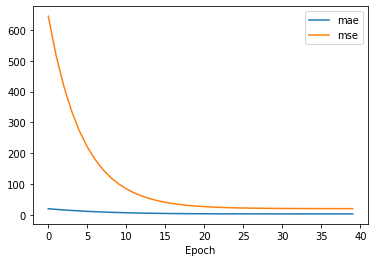

In [17]:
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.xlabel('Epoch')
plt.legend(['mae','mse'])
plt.show()

### 모델평가
* evaluate() 함수를 이용하여 데이터셋인 x_test, y_test에 대해서 지표인 mae와 mse를 확인

In [18]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 21.9309 - mae: 3.9887 - mse: 21.9309


[21.93086814880371, 3.9887282848358154, 21.93086814880371]

### 모델예측
* 학습된 모델을 통해 입력 데이터 X에 대한 예측값을 predict()를 통해 결과로 받아옵니다. 
* 실제 데이터의 결과값 y와 모델의 예측 결과인 result를 살펴봅니다.






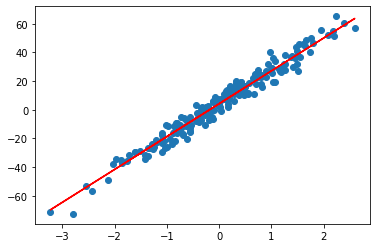

In [22]:
pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, pred, 'r')
plt.show()

* layers로 접근하여 살펴볼 수 있음

In [26]:
print(model.layers)

In [25]:
layer = model.layers[0]
print(layer.name)
layer = model.get_layer('dense')
print(layer.name)

dense
dense


* 레이어에서 사용하는 가중치(weights)와 바이어스(biases)를 get_weights() 함수를 통해서 얻을 수 있습니다. 
* 레이어에 있는 가중치와 바이어스를 통해 선형 회귀식을 얻을 수 있습니다.

In [27]:
weights, biases = layer.get_weights()

print('weights - ', weights)
print('biases - ', biases)

weights -  [[22.895754]]
biases -  [4.1801505]


* 모델에서 학습된 가중치(weights)와 바이어스(biases)를 통해 선형회귀식을 np.array(weights * X + biases)로 표현할 수 있습니다.

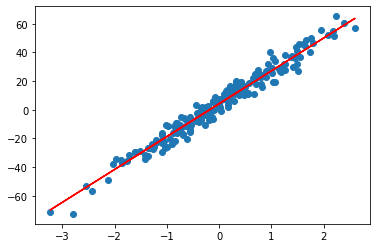

In [28]:
plt.scatter(X, y)
plt.plot(X, np.array( weights * X + biases), 'r')
plt.show()